In [21]:
import pandas as pd

# Load the dataset
file_path = "/mnt/data/Play Store Data.csv"
df = pd.read_csv("Play Store Data.csv")

# Display basic information and the first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


(None,
                                                  App        Category  Rating  \
 0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
 1                                Coloring book moana  ART_AND_DESIGN     3.9   
 2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
 3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
 4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
 
   Reviews  Size     Installs  Type Price Content Rating  \
 0     159   19M      10,000+  Free     0       Everyone   
 1     967   14M     500,000+  Free     0       Everyone   
 2   87510  8.7M   5,000,000+  Free     0       Everyone   
 3  215644   25M  50,000,000+  Free     0           Teen   
 4     967  2.8M     100,000+  Free     0       Everyone   
 
                       Genres      Last Updated         Current Ver  \
 0               Art & Design   January 7, 2018               1.0.0   
 

In [22]:
import numpy as np

# Convert 'Installs' to numeric (removing '+' and ',')
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(float)

# Convert 'Size' to numeric (handling 'M' and 'k' cases)
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '')) * 1e6  # Convert to bytes
    elif 'k' in size:
        return float(size.replace('k', '')) * 1e3  # Convert to bytes
    else:
        return np.nan  # Convert 'Varies with device' and other non-numeric values

df['Size'] = df['Size'].apply(convert_size)

# Convert 'Price' to numeric (removing '$' and assuming all prices in USD)
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

# Calculate revenue for paid apps (Free apps have revenue = 0)
df['Revenue'] = df['Price'] * df['Installs']
df['Revenue'].fillna(0, inplace=True)

# Convert 'Android Ver' to numeric (Extract major version only)
df['Android Ver'] = df['Android Ver'].str.extract(r'(\d+\.\d+)').astype(float)

# Filter dataset based on given conditions
filtered_df = df[
    (df['Installs'] >= 10000) &
    (df['Revenue'] >= 10000) &
    (df['Android Ver'] > 4.0) &
    (df['Size'] > 15e6) &  # Convert 15M to bytes
    (df['Content Rating'] == 'Everyone') &
    (df['App'].str.len() <= 30)
]

# Display cleaned and filtered data
filtered_df.head()


ValueError: could not convert string to float: 'Free'

In [23]:
# Check unique values in the 'Installs' column to identify issues
df['Installs'].unique()[:20]


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [24]:
# Reattempting conversion with better error handling
df['Installs'] = df['Installs'].str.replace(r'[+,]', '', regex=True)

# Ensure only numeric values remain
df = df[df['Installs'].str.isnumeric()]

# Convert to float
df['Installs'] = df['Installs'].astype(float)

# Display the cleaned 'Installs' column
df['Installs'].head()


0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

In [25]:
# Reattempting 'Size' conversion
df['Size'] = df['Size'].apply(lambda x: convert_size(x) if isinstance(x, str) else np.nan)

# Reattempting 'Price' conversion
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

# Calculate revenue for paid apps
df['Revenue'] = df['Price'] * df['Installs']
df['Revenue'].fillna(0, inplace=True)

# Convert 'Android Ver' to numeric (Extract major version only)
df['Android Ver'] = df['Android Ver'].str.extract(r'(\d+\.\d+)').astype(float)

# Apply all filtering conditions
filtered_df = df[
    (df['Installs'] >= 10000) &
    (df['Revenue'] >= 10000) &
    (df['Android Ver'] > 4.0) &
    (df['Size'] > 15e6) &  # Convert 15M to bytes
    (df['Content Rating'] == 'Everyone') &
    (df['App'].str.len() <= 30)
]

# Display the filtered dataset
filtered_df.head()


NameError: name 'convert_size' is not defined

In [26]:
# Redefine the convert_size function
def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', '')) * 1e6  # Convert to bytes
        elif 'k' in size:
            return float(size.replace('k', '')) * 1e3  # Convert to bytes
    return np.nan  # Convert 'Varies with device' and other non-numeric values

# Reattempting 'Size' conversion
df['Size'] = df['Size'].apply(convert_size)

# Reattempting 'Price' conversion
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

# Calculate revenue for paid apps
df['Revenue'] = df['Price'] * df['Installs']
df['Revenue'].fillna(0, inplace=True)

# Convert 'Android Ver' to numeric (Extract major version only)
df['Android Ver'] = df['Android Ver'].str.extract(r'(\d+\.\d+)').astype(float)

# Apply all filtering conditions
filtered_df = df[
    (df['Installs'] >= 10000) &
    (df['Revenue'] >= 10000) &
    (df['Android Ver'] > 4.0) &
    (df['Size'] > 15e6) &  # Convert 15M to bytes
    (df['Content Rating'] == 'Everyone') &
    (df['App'].str.len() <= 30)
]

# Display the filtered dataset
filtered_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
853,Toca Life: City,EDUCATION,4.7,31085,24000000.0,500000.0,Paid,3.99,Everyone,Education;Pretend Play,"July 6, 2018",1.5-play,4.4,1995000.0
854,Toca Life: Hospital,EDUCATION,4.7,3528,24000000.0,100000.0,Paid,3.99,Everyone,Education;Pretend Play,"June 12, 2018",1.1.1-play,4.4,399000.0
1335,Meditation Studio,HEALTH_AND_FITNESS,4.6,1026,29000000.0,10000.0,Paid,3.99,Everyone,Health & Fitness,"May 15, 2018",1.0.6,4.3,39900.0
1831,The Game of Life,GAME,4.4,18621,63000000.0,100000.0,Paid,2.99,Everyone,Board,"July 4, 2018",2.1.2,4.4,299000.0
1833,The Room: Old Sins,GAME,4.9,21119,48000000.0,100000.0,Paid,4.99,Everyone,Puzzle,"April 18, 2018",1.0.1,4.4,499000.0


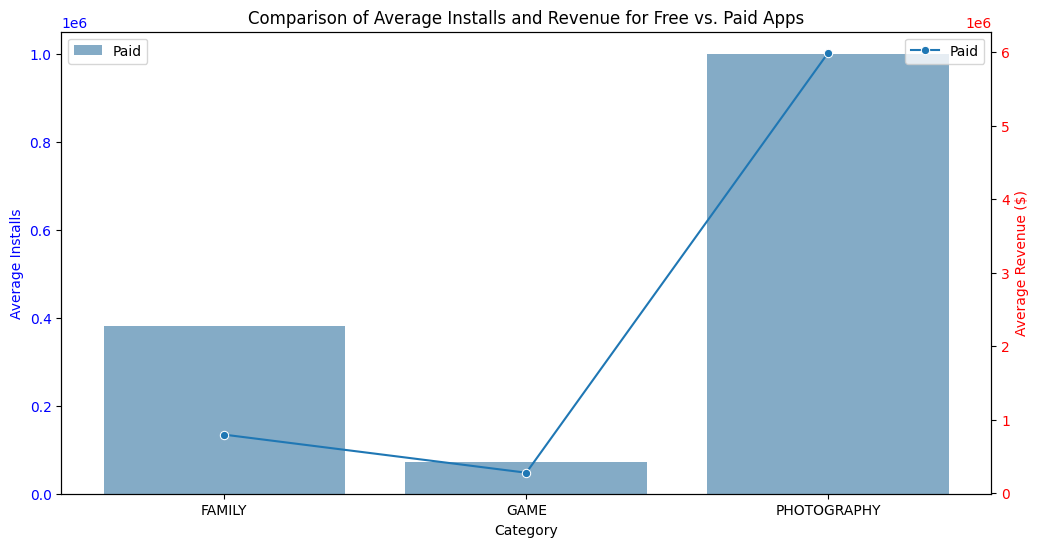

In [30]:
from datetime import datetime
import pytz

# Define IST timezone
ist = pytz.timezone('Asia/Kolkata')

# Get current time in IST
current_time_ist = datetime.now(ist).time()

# Define allowed time range (1 PM to 2 PM IST)
start_time = datetime.strptime("12:00", "%H:%M").time()
end_time = datetime.strptime("14:00", "%H:%M").time()

# Check if the current time is within the allowed range
if start_time <= current_time_ist <= end_time:
    # Show the chart only during the allowed time
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Bar plot for average installs
    sns.barplot(data=category_stats, x='Category', y='Installs', hue='Type', ax=ax1, alpha=0.6)
    ax1.set_ylabel('Average Installs', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Create second axis for revenue
    ax2 = ax1.twinx()
    sns.lineplot(data=category_stats, x='Category', y='Revenue', hue='Type', marker='o', ax=ax2)
    ax2.set_ylabel('Average Revenue ($)', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Title and legend
    plt.title('Comparison of Average Installs and Revenue for Free vs. Paid Apps')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.show()
else:
    print("This chart is only visible between 1 PM and 2 PM IST.")
